# The data

The website http://tennis-data.co.uk/alldata.php gathers outcomes of both WTA (Women Tennis Association) and ATP (Association of Tennis Professionals - men only) tennis games over several years.

A short description of each variable can be found here :
http://www.tennis-data.co.uk/notes.txt

In [1]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile

# Utils
import math

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset
Executing the cell below should provide you with :
- one pandas dataframe for all ATP matches ( df_atp )
- one pandas dataframe for all WTA matches ( df_wta )

In [3]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

In [4]:
df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  
INFO:root:52298 matches ATP in df_atp
INFO:root:29581 matches WTA in df_wta


# Question 1 - 2 points
Who are the three ATP players with the most wins ?

Federer R.     1121
Nadal R.        891
Djokovic N.     802
Ferrer D.       691
Murray A.       624
               ... 
Sergeyev I.       1
Ferrer D.         1
Willis M.         1
Silva F.F.        1
Boeker M.         1
Name: Winner, Length: 948, dtype: int64


Text(0.5, 1.0, 'Number of win by player')

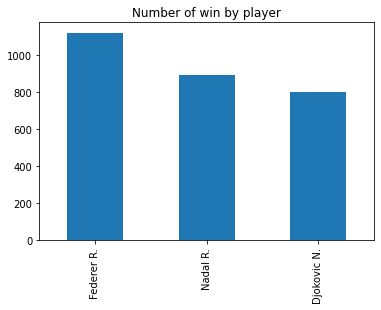

In [5]:
# Computing results :
winner_count = df_atp["Winner"].value_counts()


# Printing results :
print(winner_count)


# Plotting a happy little graph :
winner_count[:3].plot.bar()
plt.title('Number of win by player')

Therefore, the three ATP players with the most wins are :
- Federer R. with 1121 wins
- Nadal R. with 891 wins
- Djokovic N. with 802 wins

# Question 2 - 2 points
How many sets did the player “ Federer R.” win in total ?

In [6]:
# Constants :
player_name = 'Federer R.'


# Returns the number of sets won by a given player
def setsWonByPlayer(player_name):
    """Returns the number of sets won by a given player"""
    nbr_sets = 0

    for index, row in df_atp.iterrows() :
        if (row['Winner'] == player_name) :
            if (math.isnan(row['Wsets']) == False) :
                nbr_sets += row['Wsets']

        elif (row['Loser'] == player_name) :
            if (type(row['Loser']) != str) :
                if (math.isnan(row['Lsets']) == False) :
                    nbr_sets += row['Lsets']
            
    return nbr_sets



# Computing results :
total_sets = setsWonByPlayer(player_name)



# Printing results :
print(f'Total sets won : {total_sets}')

Total sets won : 2546.0


Roger Federer has won 2546 sets between 2000 and 2019.

# Question 3 - 2 points
How many sets did the player “ Federer R.” win during the years 2016 and 2017 ?

In [7]:
# Constants :
player_name = 'Federer R.'


# Returns the number of sets won in a given year by a given player
def setsWonInYear(player_name, year):
    """Returns the number of sets won in a given year by a given player"""
    nbr_sets = 0

    for index, row in df_atp.iterrows() :

        if (row['Date'].year == year) :
            if (row['Winner'] == player_name) :
                if (math.isnan(row['Wsets']) == False) :
                    nbr_sets += row['Wsets']
        
            elif (row['Loser'] == player_name) :
                if (type(row['Loser']) != str) :
                    if (math.isnan(row['Lsets']) == False) :
                        nbr_sets += row['Lsets']

    return nbr_sets



# Computing results :
sets_2016 = setsWonInYear(player_name, 2016)
sets_2017 = setsWonInYear(player_name, 2017)


# Printing results :
print(f'Sets won in 2016: {sets_2016}.')
print(f'Sets won in 2017: {sets_2017}.')
print(f'Total over 2016 and 2017: {sets_2016 + sets_2017}')

Sets won in 2016: 52.0.
Sets won in 2017: 120.0.
Total over 2016 and 2017: 172.0


Roger Federer won :
* 52 sets in 2016, which is not really surprising because he had a knee injury and 2016 and couldn't play for a substantial part of the year.
* 120 sets in 2017, which is also consistent with his career (1100+ matches won over 20 years, with 2 or 3 sets per match)

# Question 4 - 2 points
For each match, what is the percentage of victories of the winner in the past ?

In [8]:
class Player:
    def __init__(self, name):
        self.name = name
        self.wins = 0
        self.losses = 0
    
    def win_rate(self):
        if self.losses == 0:
            return 100
        return self.wins / (self.wins + self.losses) * 100
    
    def __eq__(self, other):
        return self.name == other.name

    def __str__(self):
        return f"{self.name} has a win rate of {self.win_rate()}%"

players_rate = []

for i, row in df_atp.iterrows():
    winner = Player(row["Winner"].strip())
    loser = Player(row["Loser"].strip())

    # check if players are in array
    if (winner not in players_rate):
        players_rate.append(winner)

    if (loser not in players_rate):
        players_rate.append(loser)

    # Adding win or loss accordingly
    index = players_rate.index(loser)
    players_rate[index].losses += 1

    index = players_rate.index(winner)
    players_rate[index].wins += 1

    # Printing Winner win rate 
    print(f"Winner {players_rate[index].name} had a {players_rate[index].win_rate():.2f}% win rate for this match")




Winner Khachanov K. had a 54.31% win rate for this match
Winner Djokovic N. had a 82.71% win rate for this match
Winner Nishikori K. had a 66.73% win rate for this match
Winner Federer R. had a 83.02% win rate for this match
Winner Raonic M. had a 67.81% win rate for this match
Winner Nishikori K. had a 66.80% win rate for this match
Winner Isner J. had a 62.39% win rate for this match
Winner Anderson K. had a 58.20% win rate for this match
Winner Nadal R. had a 82.47% win rate for this match
Winner Djokovic N. had a 82.73% win rate for this match
Winner Del Potro J.M. had a 71.01% win rate for this match
Winner Djokovic N. had a 82.75% win rate for this match
Winner Anderson K. had a 58.28% win rate for this match
Winner Nadal R. had a 82.49% win rate for this match
Winner Isner J. had a 62.46% win rate for this match
Winner Anderson K. had a 58.37% win rate for this match
Winner Djokovic N. had a 82.77% win rate for this match
Winner Djokovic N. had a 82.78% win rate for this match
W

# Question 5 - 12 points
Please predict the outcome for each ATP tennis game during the year 2017.
Your notebook should handle:
- the data preparation process
- the modeling phase
- the evaluation of your model(s)
- any observation or explanation you deem interesting

Bonus points if :
- your notebook contains graphics that are both interesting and pretty
- The code is clear and well explained

## Preprocessing

Before trying to use machine learning with the dataset we need to sanitize the data. This will improve our chance of getting meaningfull results and avoiding data leakage.

## Data modeling

## Testing the model

## Observation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b7403a0-e6a1-4dff-9c60-92b666e62671' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>